In [1]:
# Turning all images into data

In [7]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import os

In [8]:
!pip install pillow

In [13]:
dir = "C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/train_images/train_images/img_2524489836547201.jpg"
image = Image.open(dir)

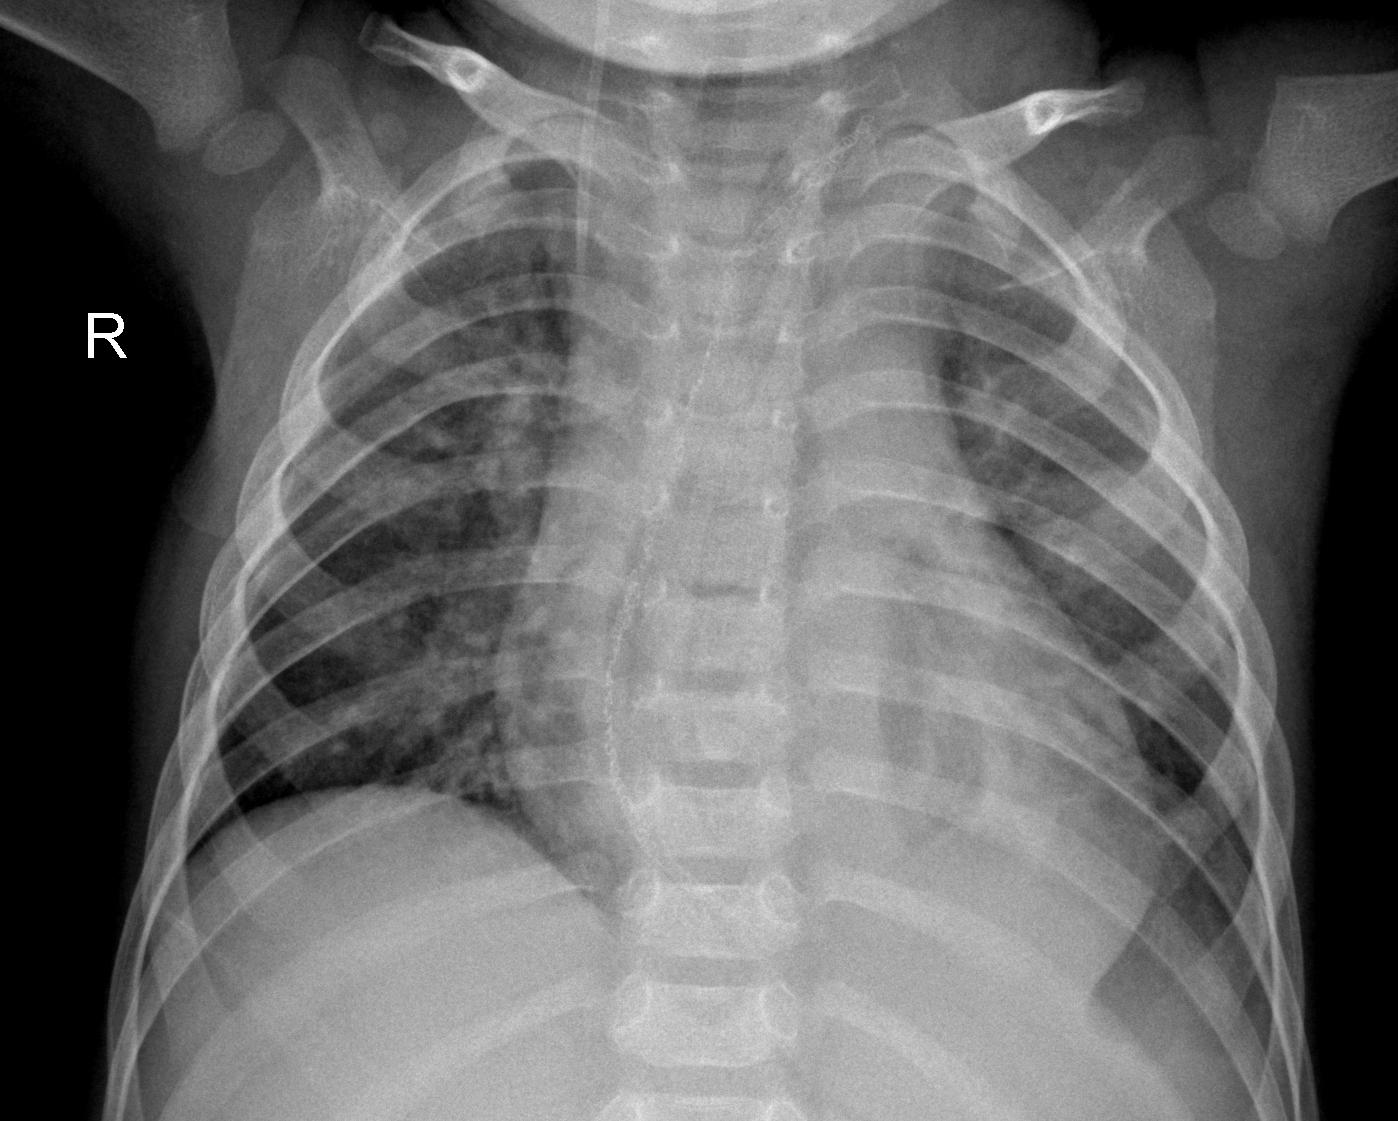

In [7]:
image

In [13]:
# Make sure image is in grayscale
image_gray = ImageOps.grayscale(image)

In [27]:
#LANCOS and BICUBIC for more quality, NEAREST is faster but lower quality.
image_resized = image_gray.resize((64,64), Image.LANCZOS)

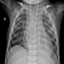

In [28]:
image_resized

In [29]:
img_arr = np.asarray(image_resized)

In [30]:
img_arr.shape

(64, 64)

In [31]:
img_arr

array([[60, 46, 45, ...,  0,  0,  0],
       [69, 78, 56, ...,  8,  6,  2],
       [ 7, 45, 80, ..., 22, 18, 13],
       ...,
       [ 0,  0,  1, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  1,  0]], dtype=uint8)

In [38]:
# flatten image to be put into dataset
img_flat = img_arr.flatten()

In [39]:
img_flat.shape

(4096,)

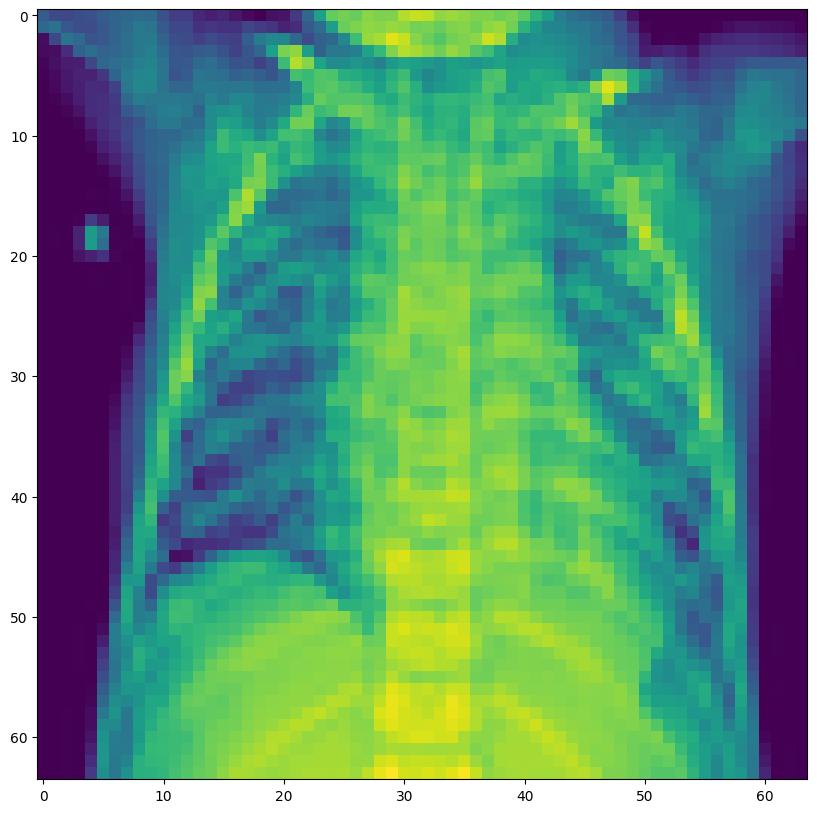

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(img_arr)
plt.show()

In [61]:
df = pd.DataFrame(data = img_flat)


In [64]:
img_flat

array([10, 23, 62, ..., 24, 26, 37], dtype=uint8)

In [62]:
df

,0
0,10
1,23
2,62
3,57
4,67
...,...
4091,83
4092,31
4093,24
4094,26


In [63]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,10,23,62,57,67,68,70,72,73,75,...,176,188,185,178,148,83,31,24,26,37


In [107]:
# Load all training data
flattened_training_images = []
for dirname, _, filenames in os.walk('C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/train_images/train_images/'):
    for filename in filenames:
        image = Image.open(dirname+filename)
        image_gray = ImageOps.grayscale(image)
        image_resized = image_gray.resize((64,64), Image.LANCZOS)
        img_arr = np.asarray(image_resized)
        img_flat = img_arr.flatten()
        img_flat = np.append(img_flat, filename)
        flattened_training_images.append(img_flat)

print(len(flattened_training_images))

column_arr = []
for i in range(4096):
    column_arr.append("pixel" + str(i))

column_arr.append("file")

df_train = pd.DataFrame(flattened_training_images, columns=column_arr) 

4672


In [108]:
df_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file
0,4,3,3,2,1,0,0,0,0,2,...,135,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg
1,0,13,45,71,86,95,109,103,94,96,...,129,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg
2,20,20,20,20,20,20,20,20,20,20,...,110,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg
3,1,11,27,49,83,107,118,123,131,140,...,130,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg
4,47,77,117,79,140,64,55,62,69,67,...,138,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,203,186,167,63,30,35,41,52,51,50,...,86,95,77,48,17,9,15,16,18,img_994723291424300125.jpg
4668,88,90,93,103,115,126,121,126,128,129,...,192,186,177,161,124,60,36,48,51,img_995905878715598226.jpg
4669,92,102,179,120,73,73,83,83,74,67,...,99,51,10,17,22,24,23,24,23,img_998073497806386670.jpg
4670,52,65,73,81,87,80,104,133,175,203,...,179,170,171,132,93,40,0,0,0,img_999093464169498379.jpg


In [110]:
train_labels = pd.read_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/labels_train.csv")

In [112]:
df_train_labels = df_train.merge(train_labels, how="inner", left_on="file", right_on="file_name")

In [113]:
df_train_labels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,41,0,0,0,0,0,0,img_1002194571005371555.jpg,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,33,0,0,0,0,0,0,img_1002972834724824498.jpg,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,13,21,20,20,20,20,20,img_1004160693662088646.jpg,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,135,112,99,65,32,10,0,img_1011159426506457600.jpg,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,117,68,51,36,17,27,36,img_1014387197248837154.jpg,img_1014387197248837154.jpg,1


In [115]:
df_train_labels = df_train_labels.drop(columns=["file"])

In [129]:
df_train_labels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg,1


In [117]:
df_train_labels.loc[0]

pixel0                                 4
pixel1                                 3
pixel2                                 3
pixel3                                 2
pixel4                                 1
                        ...             
pixel4093                              0
pixel4094                              0
pixel4095                              0
file_name    img_1002194571005371555.jpg
class_id                               1
Name: 0, Length: 4098, dtype: object

In [119]:
df_plot_image = df_train_labels.loc[0]
df_plot_image = list(df_plot_image)
df_plot_image = df_plot_image[0:4096]

In [124]:
df_plot_image[4095]

'0'

In [120]:
df_train_image_reshape = np.reshape(df_plot_image,(64,64))

TypeError: Image data of dtype <U3 cannot be converted to float

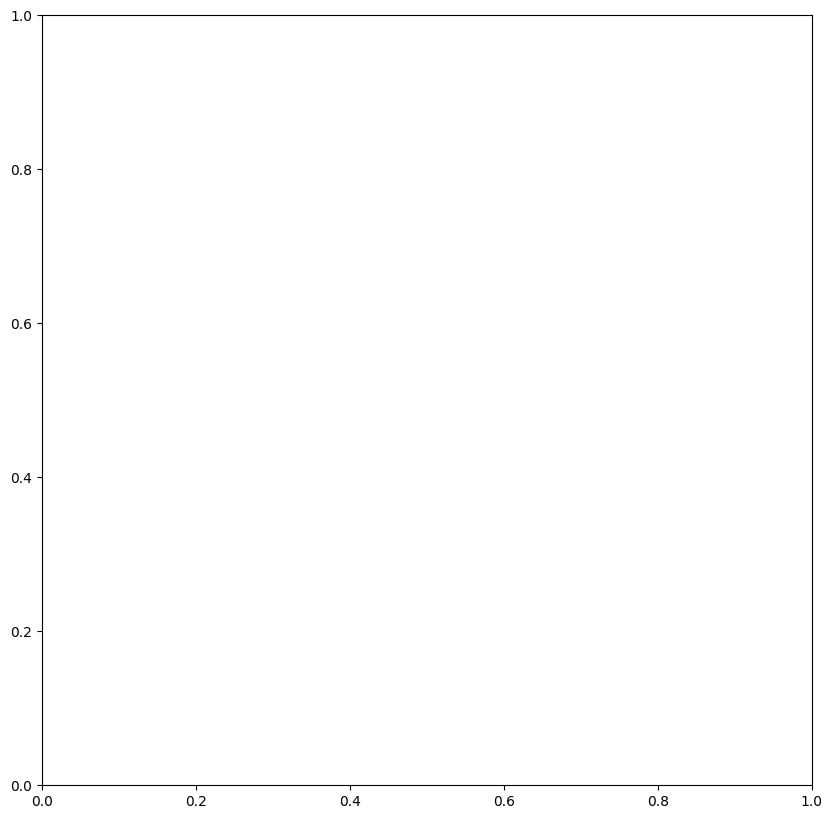

In [121]:
plt.figure(figsize=(10,10))
plt.imshow(df_train_image_reshape)
plt.show()

In [58]:
df_train.to_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_train.csv",index=False)

In [80]:
flattened_test_images = []
for dirname, _, filenames in os.walk('C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/test_images/test_images/'):
    for filename in filenames:
        image = Image.open(dirname+filename)
        image_gray = ImageOps.grayscale(image)
        image_resized = image_gray.resize((64,64), Image.LANCZOS)
        img_arr = np.asarray(image_resized)
        img_flat = img_arr.flatten()
        img_flat = np.append(img_flat, filename)
        flattened_test_images.append(img_flat)


index_arr = []
column_arr = []
for i in range(4096):
    column_arr.append("pixel" + str(i))
column_arr.append("file")

df_test = pd.DataFrame(flattened_test_images, columns=column_arr)


1168
['54' '74' '82' ... '0' '0' 'img_1005556732793955351.jpg']
['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85',

In [81]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file
0,54,74,82,82,125,135,148,119,89,102,...,148,121,46,5,0,0,0,0,0,img_1005556732793955351.jpg
1,92,99,102,102,103,100,95,85,80,75,...,152,175,171,133,131,142,78,21,0,img_1013947992995844467.jpg
2,0,0,1,7,14,14,7,59,124,124,...,125,143,72,5,0,0,0,0,0,img_1037372824298815463.jpg
3,22,52,74,89,92,91,85,79,73,67,...,191,201,188,169,122,75,12,28,27,img_1037910048520457739.jpg
4,72,49,77,91,100,120,131,111,130,116,...,149,148,128,136,153,75,32,4,0,img_1046182996541873496.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,95,146,138,133,136,136,141,139,123,111,...,190,171,161,65,0,1,1,1,3,img_979768917951898241.jpg
1164,9,14,68,59,30,71,88,38,12,83,...,114,106,103,96,69,49,30,15,3,img_988137790593390154.jpg
1165,48,61,68,68,69,69,69,73,79,80,...,114,99,75,70,68,59,43,60,78,img_990164178298384626.jpg
1166,19,17,75,57,47,91,81,40,62,66,...,92,62,38,13,0,14,16,2,6,img_993379363720995255.jpg


In [82]:
df_test.loc[0]

pixel0                                54
pixel1                                74
pixel2                                82
pixel3                                82
pixel4                               125
                        ...             
pixel4092                              0
pixel4093                              0
pixel4094                              0
pixel4095                              0
file         img_1005556732793955351.jpg
Name: 0, Length: 4097, dtype: object

In [125]:
df_test_image = df_test.loc[0]

In [126]:
df_test_image = list(df_test_image)

In [127]:
df_test_image = df_test_image[0:4096]

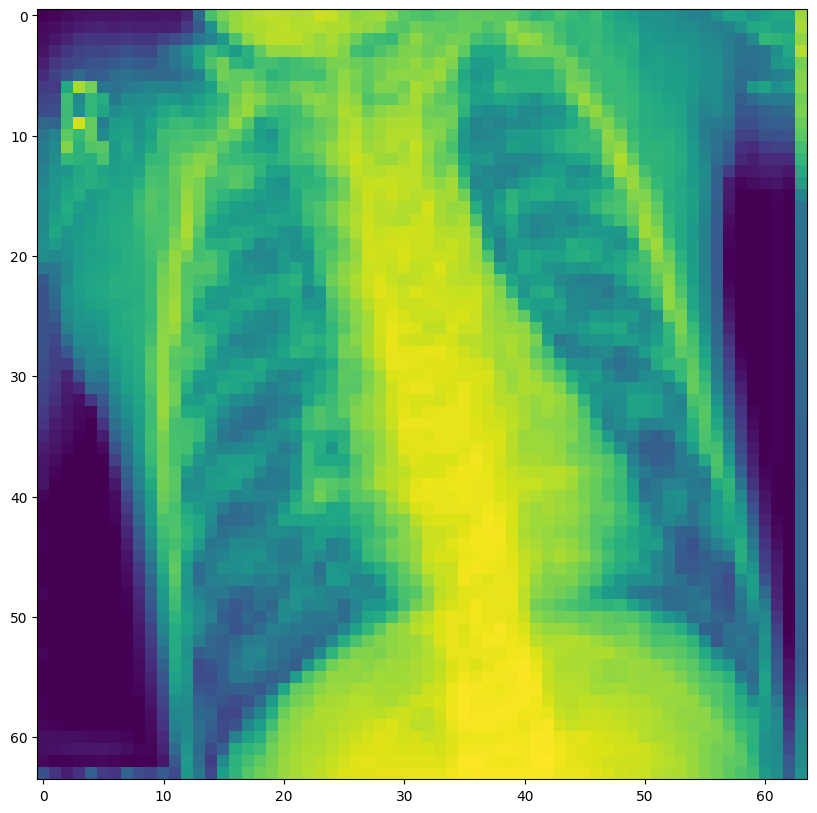

In [128]:
df_train_image_reshape = np.reshape(df_test_image,(64,64))
plt.figure(figsize=(10,10))
plt.imshow(df_test_image_reshape)
plt.show()

In [63]:
df_test.to_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_test.csv",index=False)

In [64]:
df_combined = pd.concat([df_train,df_test])

In [65]:
df_combined.shape

(5840, 4096)

In [66]:
df_combined.to_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_combined.csv",index=False)